In [1]:
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Convolution2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils import plot_model
from keras.regularizers import l1, l2
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

import pydotplus
from keras.utils import plot_model
from keras.utils import vis_utils

vis_utils.pydot = pydotplus

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

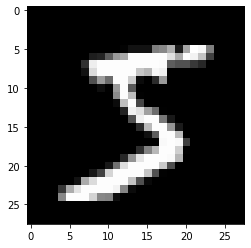

In [3]:
plt.imshow(X_train[0], cmap='gray');

In [4]:
num_epochs = 50
batch_size=32

In [5]:
result = {}

# Simple Model

In [6]:
model_name = 'Simple Model'

In [7]:
def simple_nn(X_train, y_train):
    X_train = (X_train / 255) - 0.5
    X_train = X_train.reshape((-1, 784))
    
    model = Sequential([
        Dense(64, activation='relu', input_shape=(784,)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax'),
    ])
    
    model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )
    
    history = model.fit(
        X_train,
        to_categorical(y_train),
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.25,
        verbose=0
)
    print(f'Best validation accuracy: {max(history.history["val_accuracy"])}')
    print(f'Best validation loss: {min(history.history["val_loss"])}')
    
    return (model, history.history)

In [8]:
model, result[model_name] = simple_nn(X_train, y_train)

Best validation accuracy: 0.9687333106994629
Best validation loss: 0.11494770066148291


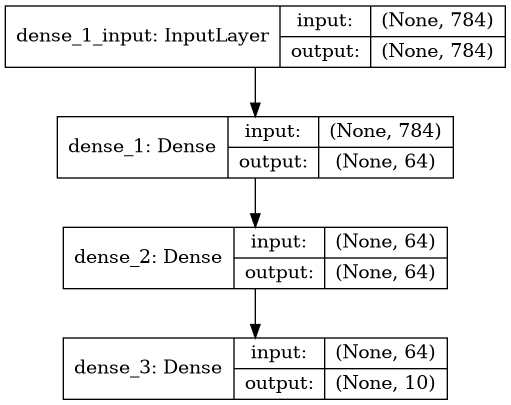

In [9]:
plot_model(model, show_shapes=True)

# Drop out

In [10]:
model_name = 'Drop out'
drop_prob_1 = 0.25
drop_prob_2 = 0.5

In [11]:
def drop_out_model(X_train, y_train):
    X_train = (X_train / 255) - 0.5
    X_train = X_train.reshape((-1, 784))
    
    model = Sequential([
        Dense(64, activation='relu', input_shape=(784,)),
        Dropout(drop_prob_1),
        Dense(64, activation='relu'),
        Dropout(drop_prob_1),
        Dense(10, activation='softmax'),
    ])
    
    model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )
    
    history = model.fit(
        X_train,
        to_categorical(y_train),
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.25,
        verbose=0
    )
    
    print(f'Best validation accuracy: {max(history.history["val_accuracy"])}')
    print(f'Best validation loss: {min(history.history["val_loss"])}')
    
    return (model, history.history)

In [12]:
model, result[model_name] = drop_out_model(X_train, y_train)

Best validation accuracy: 0.9644666910171509
Best validation loss: 0.12198316389707227


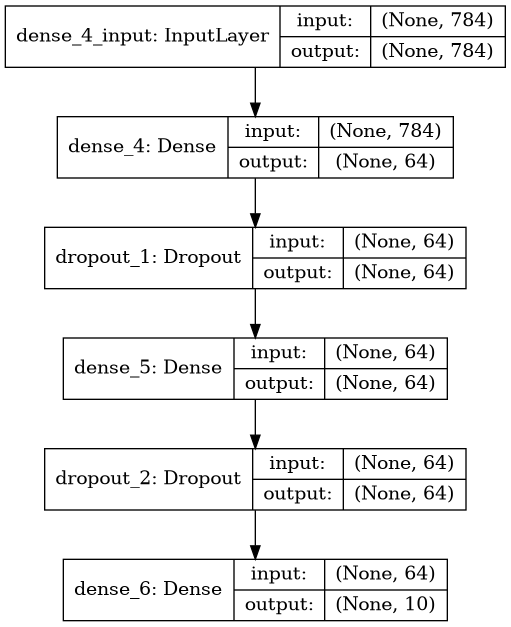

In [13]:
plot_model(model, show_shapes=True)

# L2-regularisation 

In [14]:
model_name = 'L2-regularisation'
l2_lambda = 0.0001

In [15]:
def l2_model(X_train, y_train):
    X_train = (X_train / 255) - 0.5
    X_train = X_train.reshape((-1, 784))
    
    model = Sequential([
        Dense(64, activation='relu', input_shape=(784,), kernel_regularizer=l2(l2_lambda)),
        Dense(64, activation='relu', kernel_regularizer=l2(l2_lambda)),
        Dense(10, activation='softmax'),
    ])
    
    model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )
    
    history = model.fit(
        X_train,
        to_categorical(y_train),
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.25,
        verbose=0
    )
    
    print(f'Best validation accuracy: {max(history.history["val_accuracy"])}')
    print(f'Best validation loss: {min(history.history["val_loss"])}')
    
    return (model, history.history)

In [16]:
model, result[model_name] = l2_model(X_train, y_train)

Best validation accuracy: 0.9718666672706604
Best validation loss: 0.15278167854944866


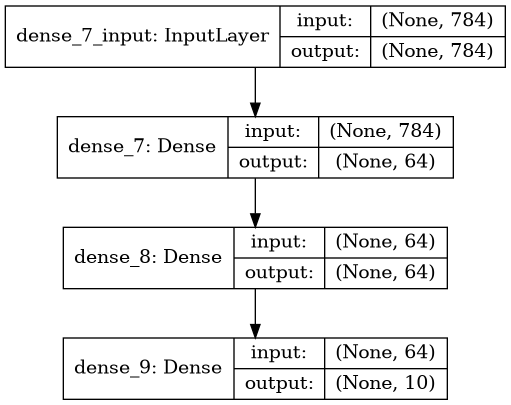

In [17]:
plot_model(model, show_shapes=True)

# Batch normalization

In [18]:
model_name = 'Batch normalization'
drop_prob_1 = 0.25
drop_prob_2 = 0.5

In [19]:
def batch_model(X_train, y_train):
    X_train = (X_train / 255) - 0.5
    X_train = X_train.reshape((-1, 784))
    
    model = Sequential([
        Dense(64, activation='relu', input_shape=(784,)),
        BatchNormalization(axis=1),
        Dense(64, activation='relu'),
        BatchNormalization(axis=1),
        Dense(10, activation='softmax'),
    ])
    
    model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )
    
    history = model.fit(
        X_train,
        to_categorical(y_train),
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.25,
        verbose=0
    )
    
    print(f'Best validation accuracy: {max(history.history["val_accuracy"])}')
    print(f'Best validation loss: {min(history.history["val_loss"])}')
    
    return (model, history.history)

In [20]:
model, result[model_name] = batch_model(X_train, y_train)

Best validation accuracy: 0.9710000157356262
Best validation loss: 0.10709458791222423


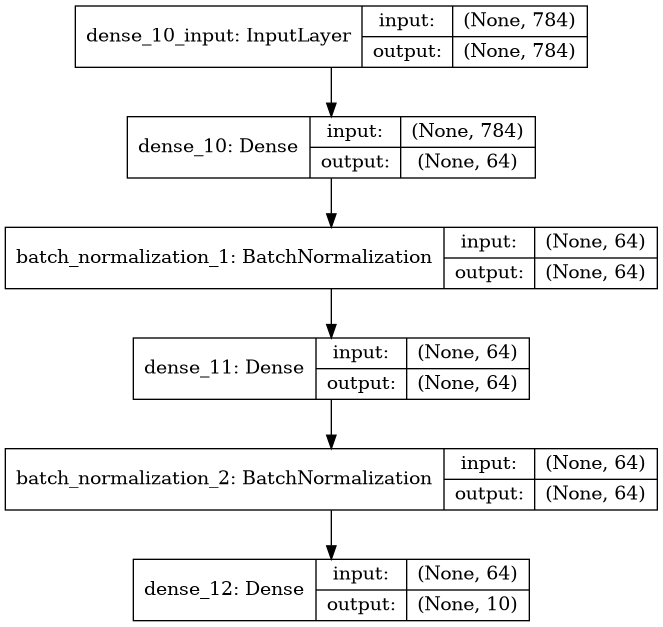

In [21]:
plot_model(model, show_shapes=True)

# Early stopping

In [22]:
model_name = 'Early stopping'
drop_prob_1 = 0.25
drop_prob_2 = 0.5

In [23]:
def stopping_model(X_train, y_train):
        
    X_train = X_train.reshape((-1, 784))

    
    model = Sequential([
        Dense(64, activation='relu', input_shape=(784,)),
        BatchNormalization(axis=1),
        Dense(64, activation='relu'),
        BatchNormalization(axis=1),
        Dense(10, activation='softmax'),
    ])
    
    model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )
    
    history = model.fit(
        X_train,
        to_categorical(y_train),
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.25,
        verbose=0,
        callbacks=[EarlyStopping(monitor='val_loss', patience=5)]
    )
    
    print(f'Best validation accuracy: {max(history.history["val_accuracy"])}')
    print(f'Best validation loss: {min(history.history["val_loss"])}')
    
    return (model, history.history)

In [24]:
model, result[model_name] = stopping_model(X_train, y_train)

Best validation accuracy: 0.9724666476249695
Best validation loss: 0.0956355641067028


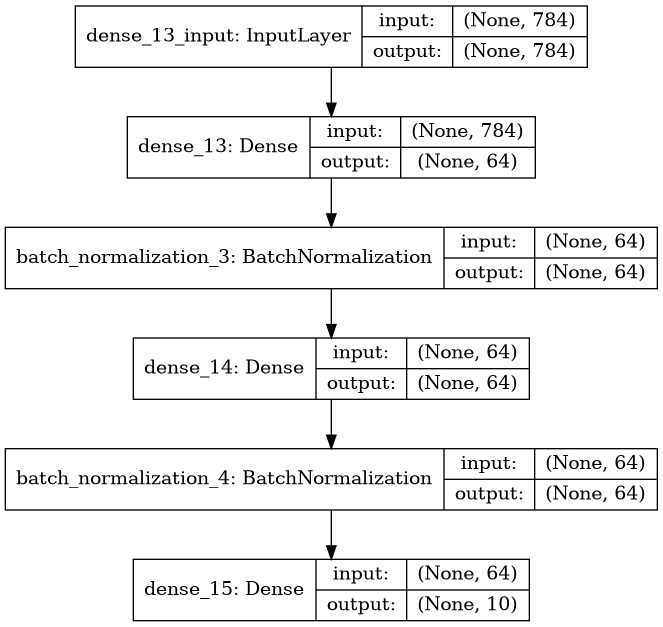

In [25]:
plot_model(model, show_shapes=True)

# Result

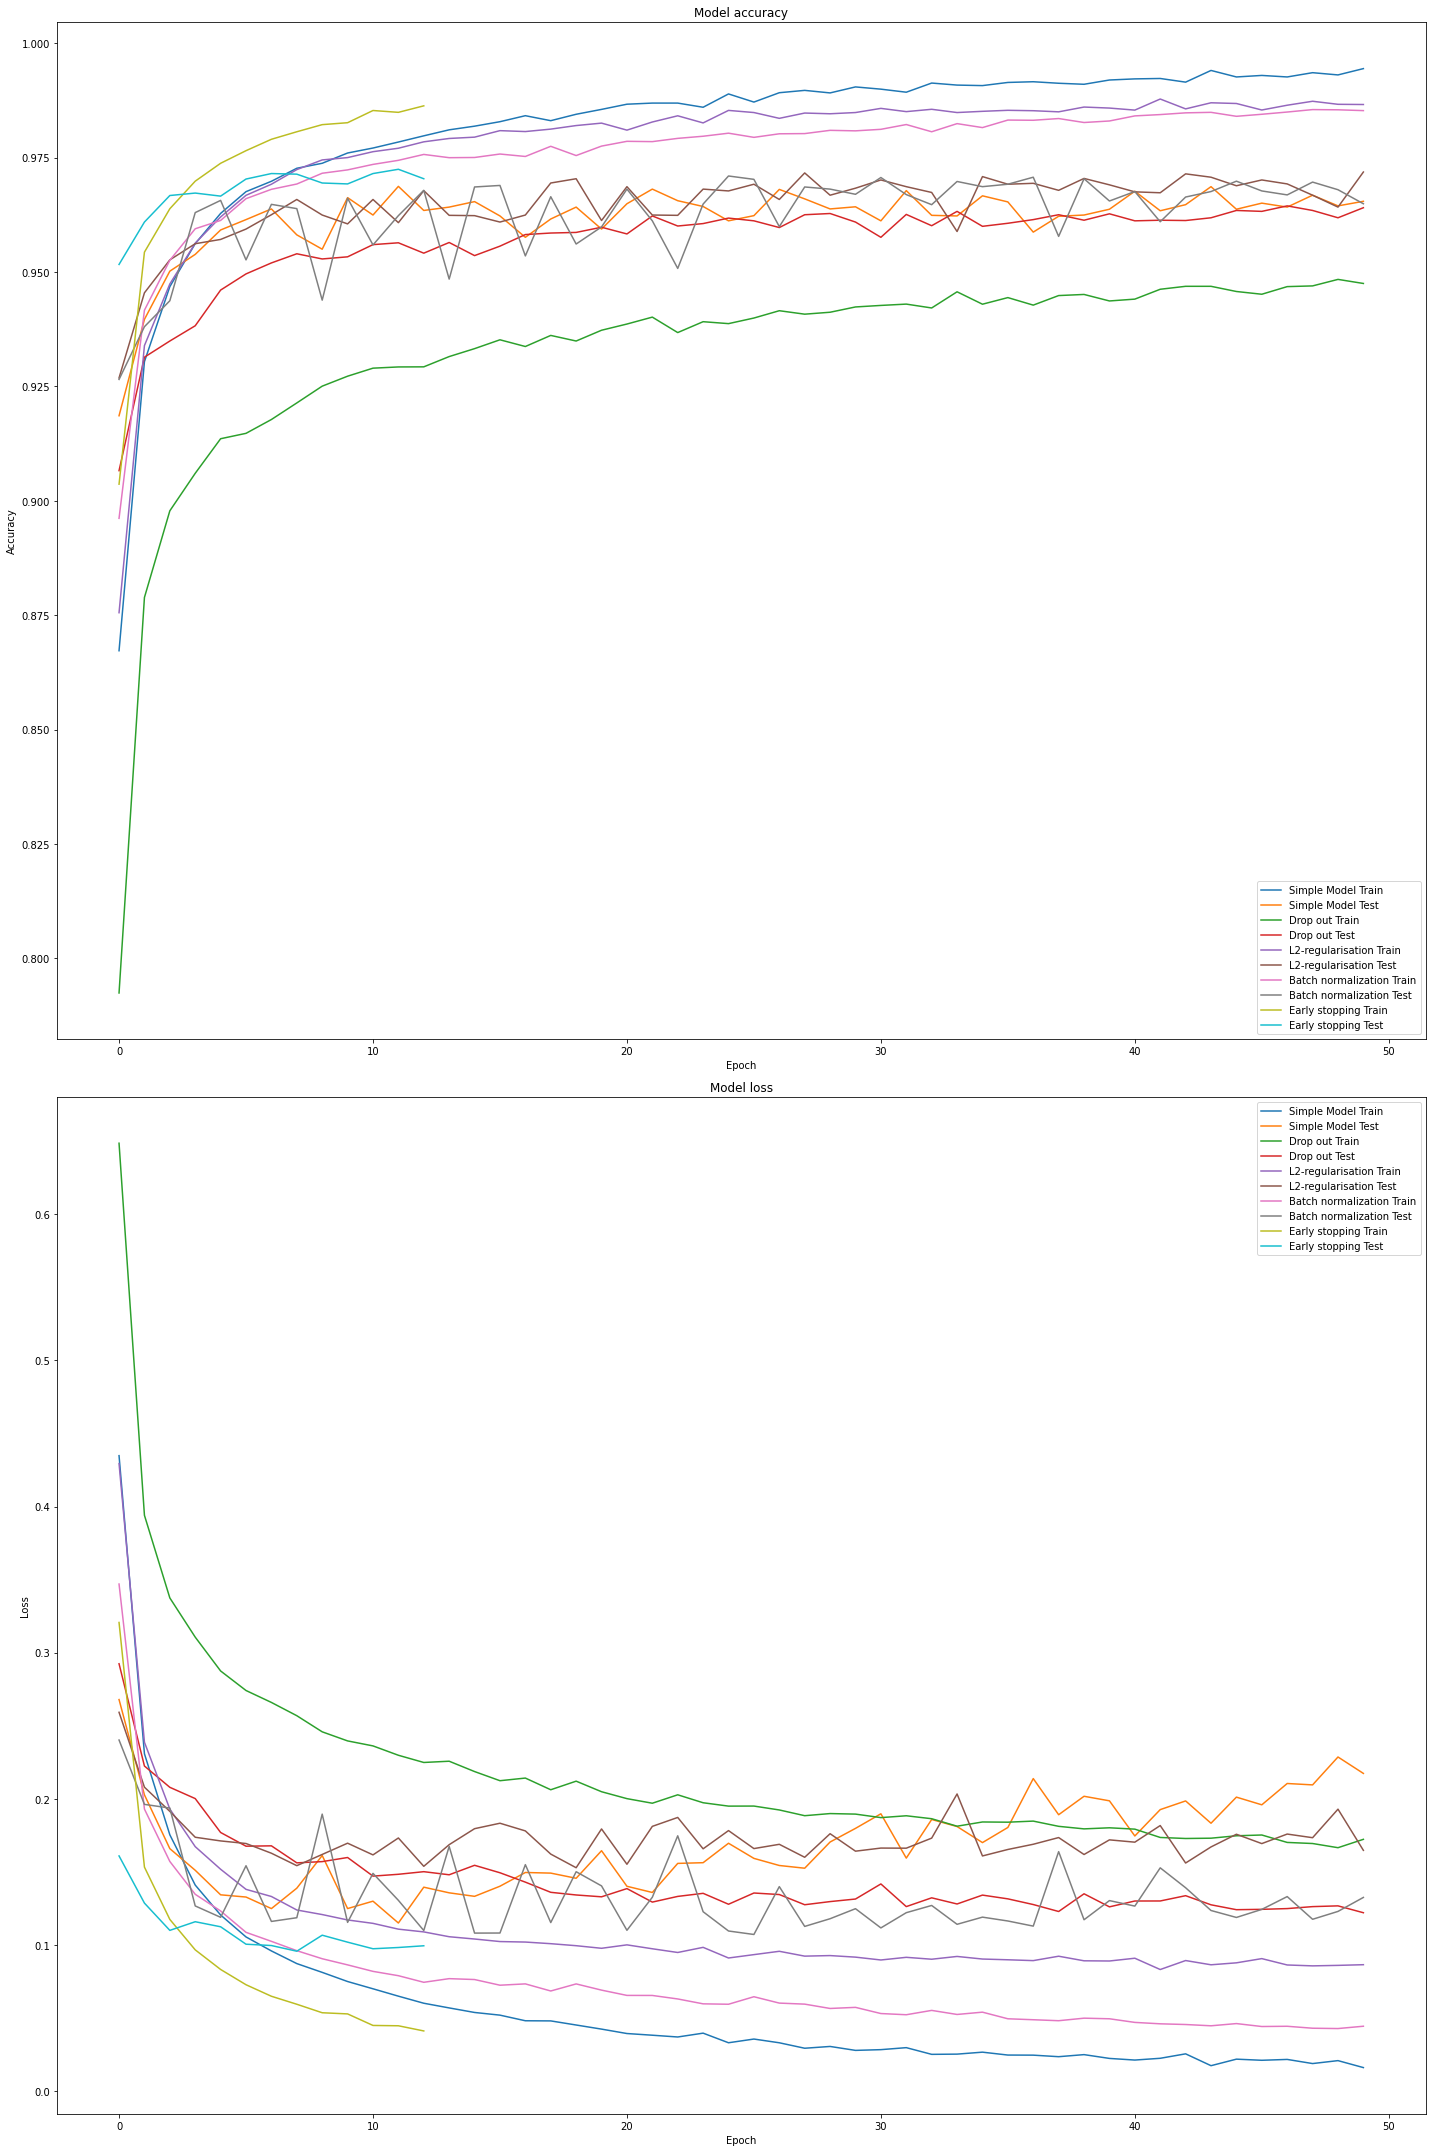

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figheight(30)
fig.set_figwidth(20)

ax1.set_title('Model accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')

ax2.set_title('Model loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')


for name, history in result.items():
    ax1.plot(history['accuracy'], label=f'{name} Train')
    ax1.plot(history['val_accuracy'], label=f'{name} Test')
    ax2.plot(history['loss'], label=f'{name} Train')
    ax2.plot(history['val_loss'], label=f'{name} Test')

ax1.legend(loc='lower right')
ax2.legend(loc='upper right')
fig.tight_layout()